# Visualising Medium Articles Data with Machine Learning

## Abstract
### This dataset has links and other attributes of articles that were published on the 'Medium' platform. The articles can be classified into 7 groups as it can be seen. An attempt to visualise this data has been done.
### We are checking how 2 properties of the dataset that is claps and reading time are related. We have also attempted to predict the number of claps when the reading time is known

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

## Importing the data

In [2]:
data = pd.read_csv("medium_data.csv")
df = pd.DataFrame(data)
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


## Getting an idea of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


In [4]:
df.shape

(6508, 10)

In [5]:
df.columns

Index(['id', 'url', 'title', 'subtitle', 'image', 'claps', 'responses',
       'reading_time', 'publication', 'date'],
      dtype='object')

In [6]:
data_numeric = df._get_numeric_data()
data_numeric.head()

,id,claps,reading_time
0,1,850,8
1,2,1100,9
2,3,767,5
3,4,354,4
4,5,211,4


## Outlining the missing data

In [7]:
missing_data = data.isnull()
missing_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
False    6508
Name: id, dtype: int64

url
False    6508
Name: url, dtype: int64

title
False    6508
Name: title, dtype: int64

subtitle
False    3479
True     3029
Name: subtitle, dtype: int64

image
False    6361
True      147
Name: image, dtype: int64

claps
False    6508
Name: claps, dtype: int64

responses
False    6508
Name: responses, dtype: int64

reading_time
False    6508
Name: reading_time, dtype: int64

publication
False    6508
Name: publication, dtype: int64

date
False    6508
Name: date, dtype: int64



## Dropping unwanted data attributes

In [9]:
df.drop(['id','image','title','subtitle','url', 'responses', 'date'], axis=1, inplace=True)

In [10]:
df.groupby(['publication']).median()

,claps,reading_time
publication,,
Better Humans,925.0,12.5
Better Marketing,328.5,5.5
Data Driven Investor,63.0,5.0
The Startup,119.0,5.0
The Writing Cooperative,160.0,4.0
Towards Data Science,130.0,6.0
UX Collective,135.0,5.0


## Applying linear regression machine learning algorithm over attributes 'claps' and 'reading time'

In [11]:
y = df['claps'].values.reshape(-1, 1)
x = df['reading_time'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)
print("The linear model is Y = {:.5}X + {:.5}".format(model.coef_[0][0], model.intercept_[0]))

The linear model is Y = 21.531X + 178.96


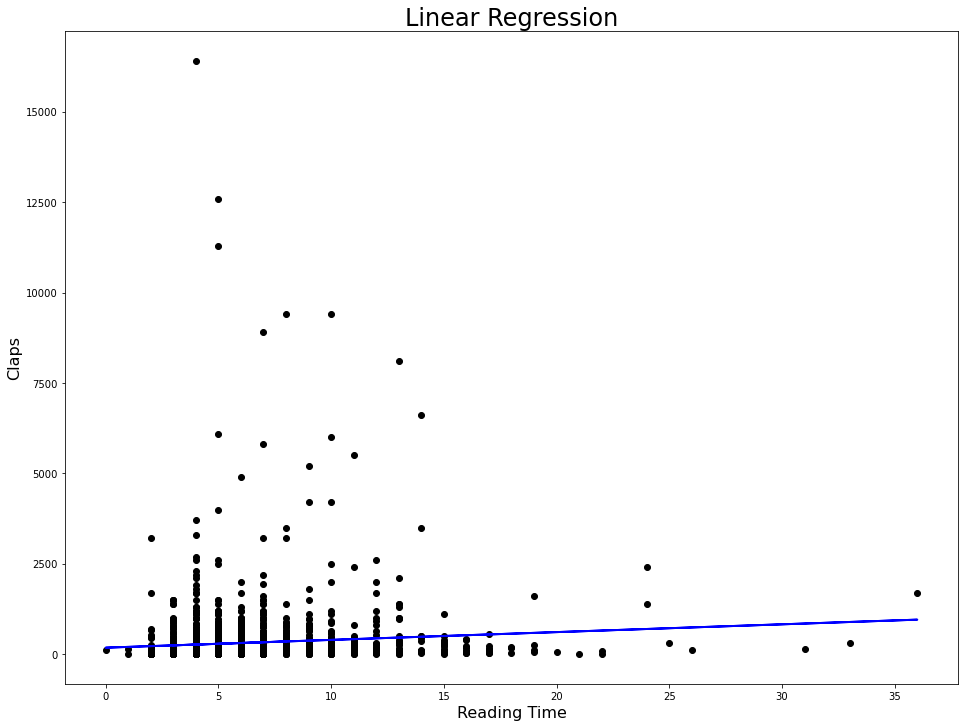

In [13]:
predictions = model.predict(x_test)
plt.figure(figsize=(16,12))
plt.scatter(x_test, y_test, c='black')
plt.plot(x_test, predictions, c='blue', linewidth=2)
plt.title("Linear Regression", size=24)
plt.xlabel("Reading Time", size=16)
plt.ylabel("Claps", size=16)
plt.show()

## Applying polynomial regression machine learning algorithm over attributes 'claps' and 'reading time'

In [14]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x_train)
model2 = LinearRegression()
model2.fit(X_poly, y_train)

LinearRegression()

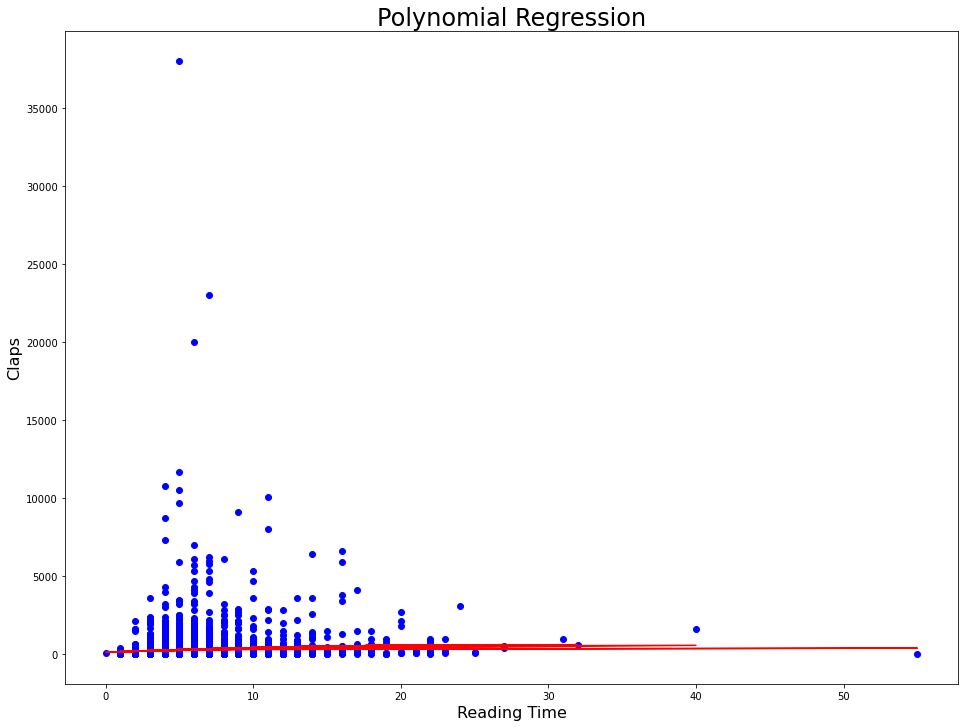

In [15]:
plt.figure(figsize = (16, 12))
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model2.predict(poly.fit_transform(x_train)), color = 'red')
plt.title("Polynomial Regression", size=24)
plt.xlabel("Reading Time", size=16)
plt.ylabel("Claps", size=16)
plt.show()

## Applying KMeans clustering machine learning algorithm over the attributes 'claps' and 'reading time'

In [16]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(x_train)
kmeans.cluster_centers_

array([[ 3.47082768],
       [ 9.99408284],
       [ 5.43505675],
       [21.925     ],
       [ 7.3878327 ],
       [47.5       ],
       [14.68152866]])

kmeans.labels_

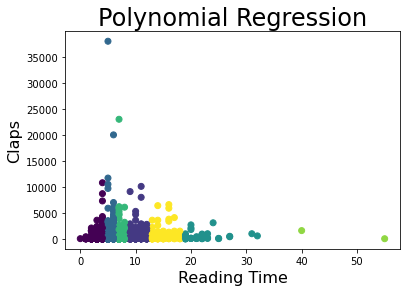

In [20]:
plt.plot()
plt.scatter(x_train, y_train, c=kmeans.labels_)
plt.title("Polynomial Regression", size=24)
plt.xlabel("Reading Time", size=16)
plt.ylabel("Claps", size=16)
plt.show()

## Plotting a histogram to represent the normal distribution nature of the attribute 'reading time'

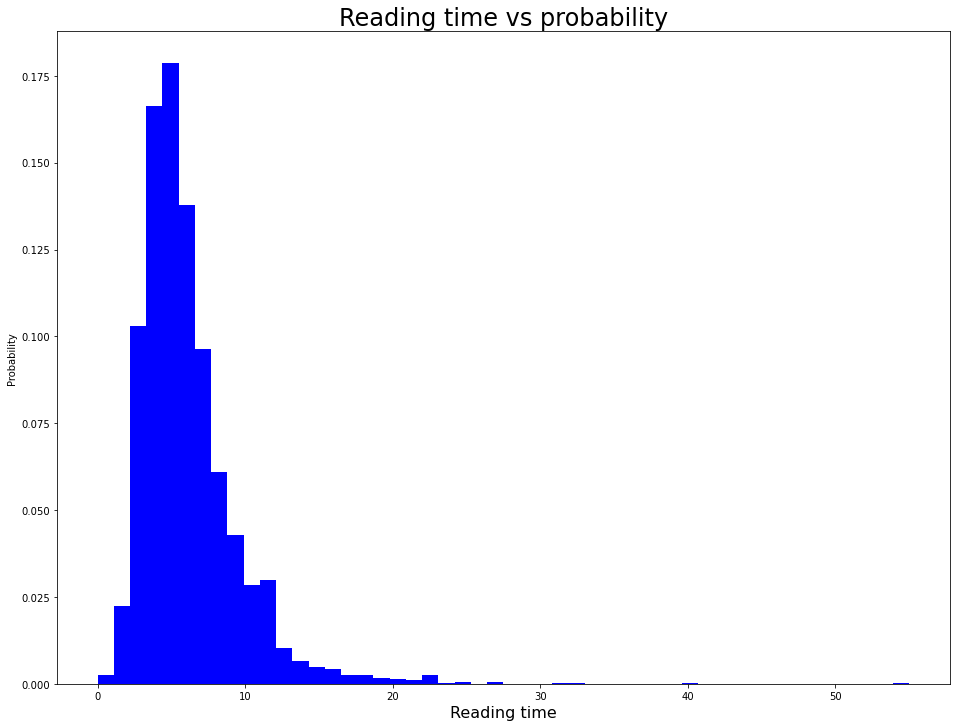

In [18]:
plt.figure(figsize=(16,12))
plt.hist(x_train, bins=50, density=True, color='b')
plt.title('Reading time vs probability', size=24)
plt.xlabel('Reading time', size=16)
plt.ylabel('Probability')
plt.show()

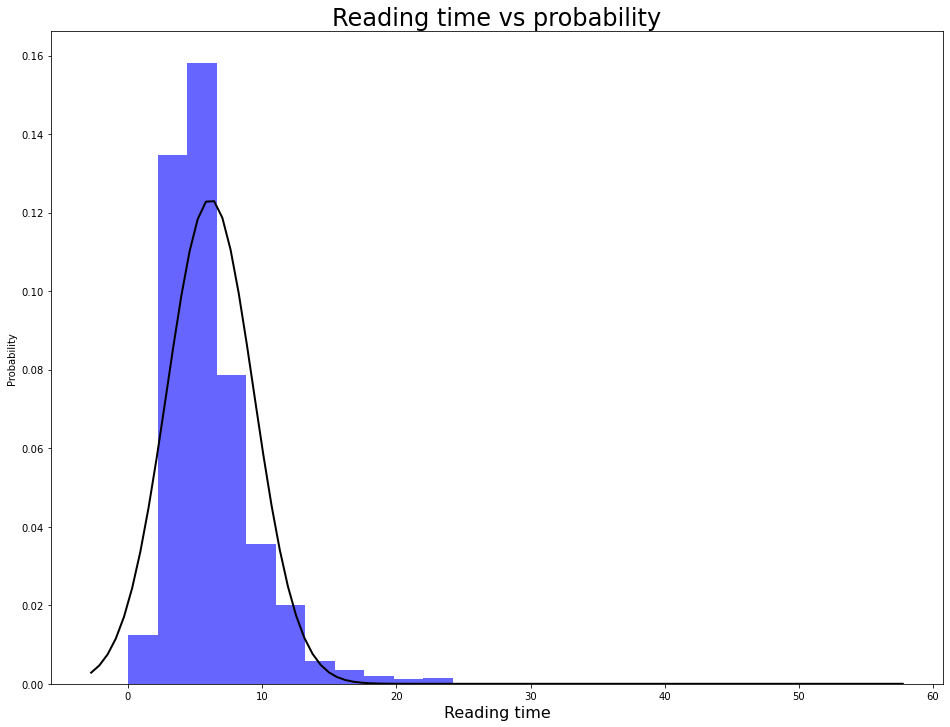

In [19]:
from scipy.stats import norm
mu, std = norm.fit(x_train)
plt.figure(figsize=(16,12))
plt.hist(x_train, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Reading time vs probability', size=24)
plt.xlabel('Reading time', size=16)
plt.ylabel('Probability')
plt.show()